# Recursive Feature Selection using Gradient based and Tree based Estimators 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [20]:
data = pd.read_csv('../data/xtr_profile.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.sample(10)

,gender,age,cust_id,became_member_on,income,days_as_member,Total offer completed,Total offer received,Total offer viewed,Total transaction,offer completed_via_email,offer completed_via_social,offer completed_via_mobile,offer completed_via_web,offer completed bogo count,offer completed discount count,offer received_via_email,offer received_via_social,offer received_via_mobile,offer received_via_web,offer received bogo count,offer received discount count,offer received informational count,offer viewed_via_email,offer viewed_via_social,offer viewed_via_mobile,offer viewed_via_web,offer viewed bogo count,offer viewed discount count,offer viewed informational count,Total transaction amount,avg_difficulty,avg_duration,total_reward_received,total_reward_defined,total_view_ratio,total_completion_ratio,avg_transaction_amt,transactions_per_membership_days
9639,M,54,13fec8f3cfae4ca186eab06b75cb3cec,2018-06-10,63000.0,898,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,4.0,1.0,0.0,0.0,4.0,4.0,3.0,4.0,1.0,0.0,0.0,4.0,75.45,0.000000,78.000000,0.0,0.0,1.0,0.000,18.86,0.004454
3386,F,62,ff7fdf82996949ec82d158a02a1d9cca,2016-12-03,57000.0,1452,4.0,6.0,6.0,17.0,4.0,3.0,3.0,4.0,3.0,1.0,6.0,5.0,5.0,4.0,3.0,1.0,2.0,6.0,5.0,5.0,4.0,3.0,1.0,2.0,255.05,8.437500,130.500000,30.0,30.0,1.0,0.667,15.00,0.011708
12499,M,29,ebcd484745a1455789c1d3c00ba3c6ea,2017-09-26,65000.0,1155,0.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,22.12,0.000000,96.000000,0.0,0.0,1.0,0.000,3.69,0.005195
6863,M,59,f126206918334d3ea43168faa612e277,2018-01-10,31000.0,1049,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.34,5.000000,168.000000,0.0,5.0,0.0,0.000,8.34,0.003813
12036,F,20,cf70251036814326955c26c9bfec7316,2018-07-17,75000.0,861,3.0,4.0,4.0,6.0,3.0,1.0,2.0,3.0,1.0,2.0,4.0,2.0,3.0,3.0,1.0,2.0,1.0,4.0,2.0,3.0,3.0,1.0,2.0,1.0,120.90,9.545455,157.090909,12.0,12.0,1.0,0.750,20.15,0.006969
3005,M,39,e91dce4a4d0b454e80f5c90dc0eb55ee,2017-12-13,51000.0,1077,1.0,3.0,3.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,2.0,3.0,1.0,3.0,0.0,0.0,3.0,2.0,3.0,1.0,3.0,0.0,0.0,25.48,7.857143,168.000000,5.0,25.0,1.0,0.333,12.74,0.001857
13587,F,53,454b00bdd77c4f588eb9f6cafd81dc5d,2018-03-29,89000.0,971,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,2.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1087.98,7.500000,114.000000,10.0,10.0,0.5,0.500,272.00,0.004119
9410,M,34,47e925c3997c4781b36d5b16047dd4cb,2018-01-07,31000.0,1052,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.99,11.666667,192.000000,0.0,12.0,0.0,0.000,1.60,0.004753
12504,M,62,0d1f4bc41883493ba6f72af2485bab65,2016-08-03,111000.0,1574,4.0,5.0,5.0,11.0,4.0,4.0,4.0,2.0,4.0,0.0,5.0,5.0,5.0,2.0,4.0,0.0,1.0,5.0,5.0,5.0,2.0,4.0,0.0,1.0,299.68,6.428571,133.714286,30.0,30.0,1.0,0.800,27.24,0.006989
4800,M,55,e21713d1cb024b369cec2380fe2bb723,2014-11-11,91000.0,2205,4.0,4.0,4.0,12.0,4.0,2.0,3.0,4.0,1.0,3.0,4.0,2.0,3.0,4.0,1.0,3.0,0.0,4.0,2.0,3.0,4.0,1.0,3.0,0.0,277.94,9.750000,186.000000,16.0,16.0,1.0,1.000,23.16,0.005442


In [22]:
# define dataset
gen_split = pd.get_dummies(data['gender'], prefix='is_')
data['income_in_k'] = data['income']/1000
data = pd.concat([data, gen_split], axis=1)
data = data.drop('income', axis=1)
data.drop('gender', axis=1, inplace=True)
data.sample(10)

,age,cust_id,became_member_on,days_as_member,Total offer completed,Total offer received,Total offer viewed,Total transaction,offer completed_via_email,offer completed_via_social,offer completed_via_mobile,offer completed_via_web,offer completed bogo count,offer completed discount count,offer received_via_email,offer received_via_social,offer received_via_mobile,offer received_via_web,offer received bogo count,offer received discount count,offer received informational count,offer viewed_via_email,offer viewed_via_social,offer viewed_via_mobile,offer viewed_via_web,offer viewed bogo count,offer viewed discount count,offer viewed informational count,Total transaction amount,avg_difficulty,avg_duration,total_reward_received,total_reward_defined,total_view_ratio,total_completion_ratio,avg_transaction_amt,transactions_per_membership_days,income_in_k,is__F,is__M,is__O
7468,59,2633bf11fcfa48ae8a94398d5239e88d,2017-12-12,1078,1.0,5.0,2.0,6.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,3.0,5.0,4.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,19.33,7.500000,195.000000,5.0,19.0,0.40,0.200,3.22,0.005566,67.0,0,1,0
9020,29,957c78e7515f4176a1fc3cebcaa9a020,2018-02-10,1018,2.0,5.0,4.0,8.0,2.0,1.0,2.0,2.0,1.0,1.0,5.0,4.0,5.0,5.0,2.0,3.0,0.0,4.0,4.0,4.0,4.0,1.0,3.0,0.0,29.79,7.090909,178.909091,7.0,18.0,0.80,0.400,3.72,0.007859,71.0,0,1,0
9009,53,47f654b9ff57453d890a690bbb491d56,2014-10-16,2231,2.0,5.0,3.0,16.0,2.0,1.0,2.0,2.0,1.0,1.0,5.0,1.0,5.0,5.0,1.0,1.0,3.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,48.15,4.500000,124.800000,7.0,7.0,0.60,0.400,3.01,0.007172,60.0,0,1,0
12191,67,ac3b5e911fd3406bb37da9e001ed306e,2018-03-21,979,2.0,4.0,3.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,4.0,2.0,4.0,4.0,0.0,3.0,1.0,3.0,2.0,3.0,3.0,0.0,3.0,0.0,37.34,8.222222,184.000000,4.0,7.0,0.75,0.500,18.67,0.002043,68.0,0,1,0
7746,56,37c5d270f84c4a4ca153b617d0523782,2018-02-27,1001,1.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,5.0,3.0,5.0,4.0,1.0,2.0,2.0,4.0,2.0,4.0,4.0,1.0,2.0,1.0,15.11,6.000000,180.000000,2.0,9.0,0.80,0.200,15.11,0.000999,76.0,1,0,0
6248,24,28e1cc20d9eb4e77ba81846057def62e,2018-05-08,931,2.0,5.0,5.0,10.0,2.0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,3.0,4.0,3.0,2.0,1.0,2.0,114.06,9.166667,150.000000,15.0,25.0,1.00,0.400,11.41,0.010741,51.0,0,1,0
2343,70,2b539f377ad24c0fad2dc5d1034bebd7,2017-09-19,1162,1.0,6.0,6.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,6.0,4.0,6.0,5.0,2.0,3.0,1.0,6.0,4.0,6.0,5.0,2.0,3.0,1.0,23.17,6.846154,156.923077,5.0,22.0,1.00,0.167,23.17,0.000861,98.0,0,1,0
1092,53,a2d2404774b645379a29ec10433ca73a,2014-12-17,2169,2.0,3.0,3.0,7.0,2.0,2.0,2.0,2.0,0.0,2.0,3.0,2.0,3.0,3.0,0.0,2.0,1.0,3.0,2.0,3.0,3.0,0.0,2.0,1.0,97.18,6.375000,177.000000,5.0,5.0,1.00,0.667,13.88,0.003227,62.0,0,1,0
5889,54,f8e1667028a44d4b969a55774352235d,2014-11-20,2196,2.0,5.0,3.0,19.0,2.0,1.0,2.0,2.0,0.0,2.0,5.0,3.0,4.0,4.0,1.0,3.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,158.15,8.100000,146.400000,5.0,20.0,0.60,0.400,8.32,0.008652,48.0,1,0,0
6789,49,861832bd241b43fd8a8005046bad9efc,2017-11-15,1105,2.0,5.0,4.0,4.0,2.0,2.0,2.0,2.0,1.0,1.0,5.0,5.0,5.0,3.0,2.0,2.0,1.0,4.0,4.0,4.0,3.0,1.0,2.0,1.0,42.73,6.272727,157.090909,7.0,20.0,0.80,0.400,10.68,0.003620,52.0,0,1,0


## Finding set of correlated features

In [26]:
correlated_features = set()
correlation_matrix = data[['is__F', 'is__M', 'is__O', 'age', 'income_in_k', 'avg_difficulty', 'avg_duration', 'avg_transaction_amt', 'transactions_per_membership_days', 'days_as_member']].corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
correlated_features

{'is__M'}

## Adding label

In [28]:
data['customer_type'] = "passive"
data.loc[(data['total_view_ratio'] >= 0.6) & (data['total_completion_ratio'] >= 0.2), 'customer_type'] = "active" 
data['customer_type'].value_counts()

active     9637
passive    5188
Name: customer_type, dtype: int64

## Running RFECV

In [48]:
X = data[['is__F','is__M', 'is__O', 'age', 'income_in_k', 'avg_difficulty', 'avg_duration', 'avg_transaction_amt', 'transactions_per_membership_days', 'days_as_member']]
target = data['customer_type']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

In [49]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 8


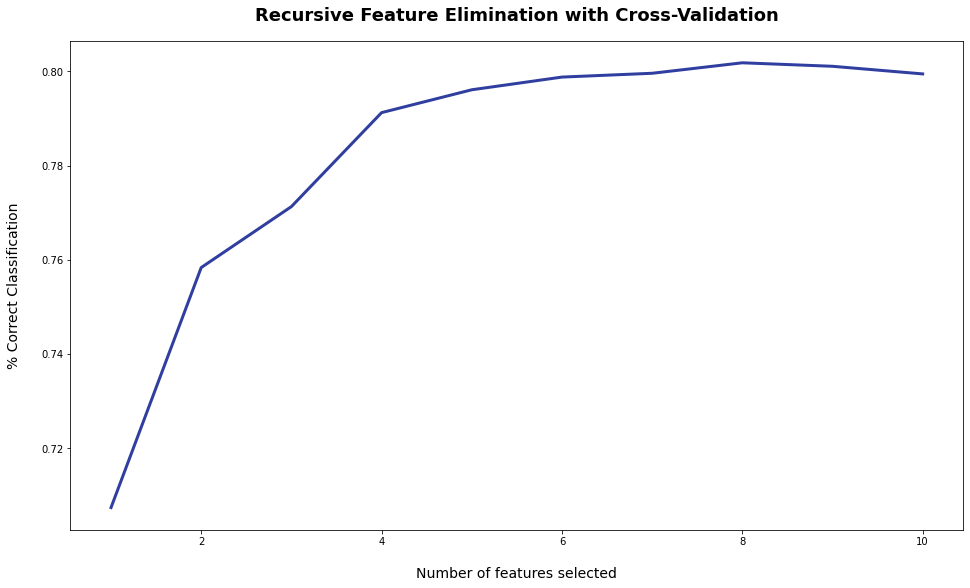

In [50]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [51]:
# Least important features

print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[1 2]


In [52]:
rfecv.estimator_.feature_importances_

array([0.01364135, 0.08385798, 0.0975853 , 0.10348927, 0.09642821,
       0.28402357, 0.19045224, 0.13052208])

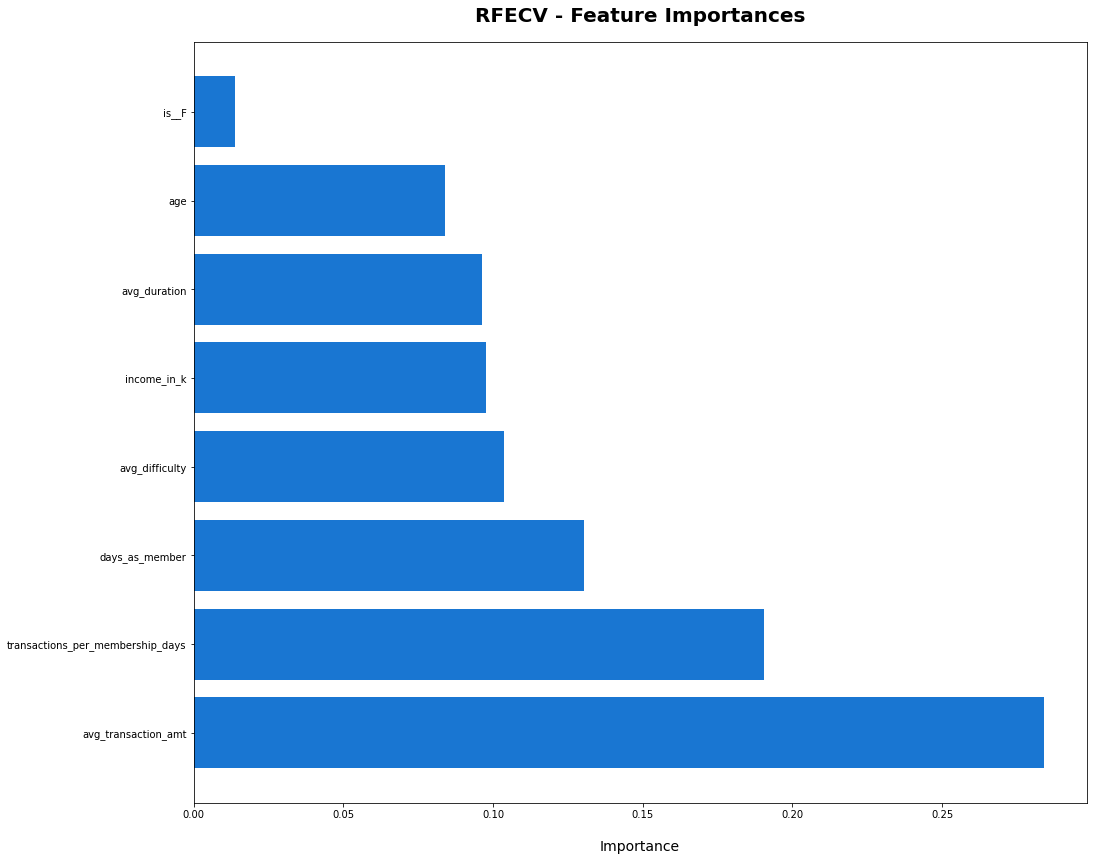

In [54]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [57]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
X = data[['is__F', 'age', 'income_in_k', 'avg_difficulty', 'avg_duration', 'avg_transaction_amt', 'transactions_per_membership_days', 'days_as_member']]
y = target
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.718 (0.010)


In [58]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
X = data[['is__F', 'age', 'income_in_k', 'avg_difficulty', 'avg_duration', 'avg_transaction_amt', 'transactions_per_membership_days', 'days_as_member']]
y = target
# create pipeline
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.799 (0.010)
